In [164]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import random
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter

In [11]:
segment_dir = 'segment'

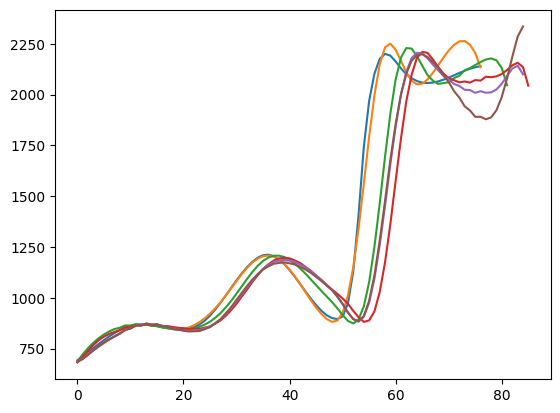

In [178]:
i = 0
for segment_name in os.listdir(segment_dir):
    if i < 21:
        i += 1
        continue

    segment = np.load(os.path.join(segment_dir, segment_name))
    x = np.arange(len(segment))

    local_maxima = argrelextrema(segment, np.greater)[0]
    local_minima = argrelextrema(segment, np.less)[0]
    if not len(local_maxima) or not len(local_minima):
        continue

    plt.plot(segment)
        
    change_points = np.concatenate([local_maxima, local_minima])
    change_points = np.sort(change_points)

    mids = (change_points[1:] + change_points[:-1]) // 2
    change_points = np.unique(np.concatenate([change_points, mids]))

    change_points = np.unique(np.concatenate([change_points, [0, len(segment) - 1]]))

    for i in range(5):
        noise = np.floor(np.random.rand(len(change_points)) * 2 - 1)
        change_points = change_points.astype(np.float64) + noise
        change_points = np.clip(change_points, 0, len(segment) - 1)
        change_points = np.unique(change_points)
    
        change_points_value = np.interp(change_points, x, segment) + np.floor(np.random.rand(len(change_points)) * 10 - 5)
        spline = make_interp_spline(change_points, change_points_value)
        y = spline(x)

        y = resample(y, len(segment) + np.random.randint(len(segment) // 5))
        y = savgol_filter(y, 15, 5)
    
        plt.plot(y)
        #plt.show()

    break